In [1]:
import requests
import re
import matplotlib.pyplot as plt

## Getting the data 

In [2]:
def get_content(param_1):
    """
    This is a python function used to get an article from 
    Wikipedia API, and gives a json response
    """
    params = {
        "action": "query",
        "format": "json",
        "prop": "extracts",
        "explaintext": True,
        "titles": param_1
    }

    response = requests.get("https://en.wikipedia.org/w/api.php", params=params)
    return response.json()

## Cleaning
In this section, the retrieved data is cleaned into the prescribed format

In [21]:
def merge_contents(data):
    
    #these are relevant headings
    rel_headings = data['query']['pages']['22834']
    
    #extract the main content and split based on line return
    content = rel_headings["extract"].split("\n")
    
    #remove all writing after the main article
    ind = content.index("== See also ==")
    content = content[:ind]
    
    #strip trailing spaces from text to make them well formatted
    content = [x.strip() for x in content]
    
    #remove items that are repeating
    content = list(set(content))
    
    # other things to remove
    thrash = ['','3', '{\\displaystyle {\\ce {O + O2 <-> O3}}}', '⟶','2','ν','⟷','O',
          '{\\displaystyle {\\ce {O2{}+{\\mathit {h}}\\nu _{uv}->2O}}}','+','h' ]
    content = [x for x in content if x not in thrash]
    
    #remove the headings
    content = [x for x in content if not x.startswith("==")]
    
    #remove comas (,) full stop(.) and brackets
    content = [x.replace(",", "")
               .replace(".", "")
               .replace("(", "")
               .replace(")", "")
               .strip()
              for x in content]
    
    return ",".join(content)

In [22]:
merge_content = merge_contents(data)
#merge_content

## Tokenization

In [23]:
def tokenize(content):
    bow = [word.replace(".", "")
               .replace(",", "")
               .replace("\\", "")
           for word in content.split(" ")
          ] 
    
    return bow

def lower_collection(collection):
    return [x.lower() for x in collection]


In [24]:
#testing the function to see if it performs as expected
data = get_content("Ozone_layer")
merge_content = merge_contents(data)
collection = tokenize(merge_content)
lower = lower_collection(collection)


## Term Frequency

In [25]:
def count_frequency(collection):
    tf = {}
    for item in collection:
        tf[item] = collection.count(item)
    return tf

## Visualization

In [26]:
def print_most_frequent(frequencies, n):
    vals = sorted(frequencies.items(), key=lambda x:x[1], reverse=True)[:n]
    word = []
    freq = []
    for val in vals:
        print(val[0],val[1] )
        word.append(val[0])
        freq.append(val[1])
        
    return word, freq

In [27]:
freq = count_frequency(lower)
twenty = print_most_frequent(freq, 20)

the 181
of 89
ozone 74
and 71
in 62
to 60
is 39
a 31
by 25
layer 22
that 20
are 17
radiation 16
be 15
was 15
from 13
for 12
at 12
ultraviolet 12
nm 12


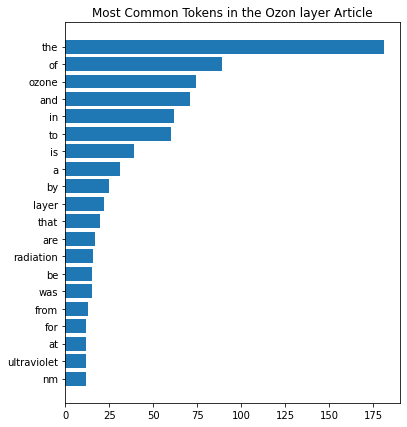

In [28]:
#Plot twenty most common words
plt.figure().set_figheight(7)
plt.barh( twenty[0][::-1], twenty[1][::-1], )
plt.title("Most Common Tokens in the Ozon layer Article")
plt.show()

## Filtering

In [29]:
def remove_stop_words(words, stop_words):
    return [x for x in words if not(x in stop_words)]

ozone 74
layer 22
radiation 16
ultraviolet 12
nm 12
as 11
stratosphere 11
with 10
atmosphere 10
uv 8
depletion 8
surface 8
into 7
cfcs 7
earth's 7
over 6
air 6
out 6
oxygen 6
latitudes 6


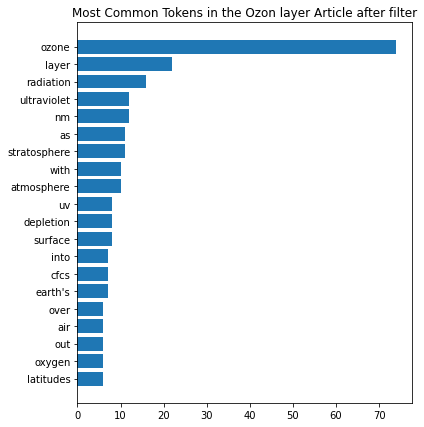

In [30]:
stop_words = ["at", "the", "of", "our", "from", "be", "that", "are", "by", "is", "a", "to", "in", "it","with"
            "as", "on", "about", "can", "for", "because", "and", "was", "these", "this", "which", "has", "have", "an"]
filtered = remove_stop_words(lower, stop_words)
freq = count_frequency(filtered)
twenty = print_most_frequent(freq, 20)
#Plot twenty most common words
plt.figure().set_figheight(7)
plt.barh( twenty[0][::-1], twenty[1][::-1], )
plt.title("Most Common Tokens in the Ozon layer Article after filter")
plt.show()